# Word Prediction with an ngram Model of Language

## Date: 1/19/2018
## Author: Hiro Miyake

# Table of Contents

1. Introduction
2. Ngram model of language
3. Word prediction with an ngram model of language  
 3.1 Generalizing the example  
 3.2 ngram model with backoff
4. Overview of the data source
5. Ngram of the data source
6. References

# 1. Introduction

In this R Jupyter notebook, I explain how my [wordprediction](https://hiromiyake.shinyapps.io/wordprediction/) Shiny app works. The app takes as input a partially complete sentence and attempts to predict the next word in the sentence. This is accomplished by taking a text corpus and modeling the English language as an ngram. First I will briefly explain what an ngram model of language is, and then apply it to our text data set.

# 2. Ngram model of language

One way to understand language is to consider each word as a single unit. So let's take an example sentence,

**Today is sunny so she is happy.**

There are 7 words in this sentence. For simplicity, we can ignore capitalization and turn all capital letters to lower case and also discard punctuations. Once this is done, this sentence is now

**today is sunny so she is happy**

A 1-gram (or equivalently, a unigram) for this sentence is the set of words,

$S_1$ = {"today", "is", "sunny", "so", "she", "happy"}.

We can also construct a set of 2-grams (or equivalently, digrams) as

$S_2$ = {"today is", "is sunny", "sunny so", "so she", "she is", "is happy"}.

A 3-gram (or equivalently, a trigram) set is

$S_3$ = {"today is sunny", "is sunny so", "sunny so she", "so she is", "she is happy"}.

A 4-gram set is

$S_4$ = {"today is sunny so", "is sunny so she", "sunny so she is", "so she is happy"}.

And so on.

# 3. Word prediction with an ngram model of language

If that sentence was the only sentence we knew, then word prediction based on, for example, a 3-gram model of language indicates that if we were given the phrase,

**today is**

then based on our data, we would predict

**sunny**

because in the 3-gram set the only 3-gram that starts with

**today is**

has

**sunny**

coming after it.

If we were given the phrase

**sunny**

then a 2-gram model would predict that the next word will be

**so**.

What about predicting what comes after

**is**?

This is a little tricky because it could be either

**sunny** or **happy**

in a 2-gram model. In general, either would be equally appropriate given a 2-gram model.

What is we are given a word not in the example sentence such as

**he**?

In this case, the 1-gram model is applied, which means that the next word predicted is just the most frequently occuring single word in the example, in this case

**is**.

## 3.1. Generalizing the example

That was with just one sentence as a data source. What we can do is take many such sentences and create a table of how often each ngram occurs in the data set. Then if you want to predict a word based on a 4-gram, then you can look at the table generated from the data for 4-grams and look at the most frequently occuring match to make a prediction.

## 3.2. ngram model with backoff

If we are going to automate the word prediction procedure with a finite amount of resources and time, we need to decide a priori which ngrams we want to consider for any input given. In general, if $n$ is larger for the ngram, the predicted word will be more accurate because there are more words to base your prediction on. However, that means more words in a provided phrase needs to match, which becomes more unlikely as $n$ increases. To deal with this situation, one can perform a backoff. An example will be illustrative. Say you want to start by considering a 4-gram model. You are given the phrase

**he is a**.

First, you search for a match in your 4-gram table. If you find no match, then you search for the phrase

**is a**

in the 3-gram table. If you find no match, then you search for the phrase

**a**

in the 2-gram table. If you still find no match, then you predict the most frequently occuring 1-gram.

Further explanations of ngrams can be found on [Wikipedia](https://en.wikipedia.org/wiki/N-gram), and a more thorough discussion is given in the book ''Speech and Language Processing'' by D. Jurafsky and J. H. Martin.

# 4. Overview of the data source

For my Shiny app, I use the `en_US.news.txt` file provided in the capstone course of the [Data Science Specialization](https://www.coursera.org/specializations/jhu-data-science) by Johns Hopkins University on Coursera.

We can take a look at the first few lines of the file to see what is in it.

In [1]:
con = file("final/en_US/en_US.news.txt", "r")
train_file = readLines(con, 1)
print(train_file)
train_file = readLines(con, 1)
print(train_file)
train_file = readLines(con, 1)
print(train_file)
close(con)

[1] "He wasn't home alone, apparently."
[1] "The St. Louis plant had to close. It would die of old age. Workers had been making cars there since the onset of mass automotive production in the 1920s."
[1] "WSU's plans quickly became a hot topic on local online sites. Though most people applauded plans for the new biomedical center, many deplored the potential loss of the building."


Let's see how many lines there are in this file.

In [2]:
con = file("final/en_US/en_US.news.txt", "r")
i = 0
while (TRUE) {
  temp = readLines(con,1)
  if (identical(temp, character(0))) {
    break ## if I reach the end of the txt file, end the loop
  }
  i = i + 1
}
print(i)
close(con)

[1] 1010242


We see that there are 1010242 lines in this file. The `en_US.news.txt` file itself is 206 MB, so for our prediction code to run in a reasonable amount of time and deal with reasonably sized data, we can take a subset of the file. In particular, I decided to use 1% of the file for the ngram generation. The code I used to generate a subset text file is given in `trainsubsetting.R`.

# 5. Ngram of the data source

Out of this subset text data set, I create ngrams (up to 4-grams) using the `ngramgenerator.R` file. The output of this are saved in `ngram4.RData`. Then the Shiny app can just load this data. This is significantly more time and memory efficient that having to create the ngrams on the fly. Let's load this ngram data and see what is in it.

In [3]:
load('wordprediction/ngram4.RData')

Let's see how many 1-, 2-, 3-, and 4-grams are here.

In [4]:
length(ngram1)
length(ngram2)
length(ngram3)
length(ngram4)

[1] 30596

[1] 185513

[1] 281943

[1] 296842

We see that the larger the $n$ of the ngram, the more ngrams there are. Let's see what the top ngrams are.

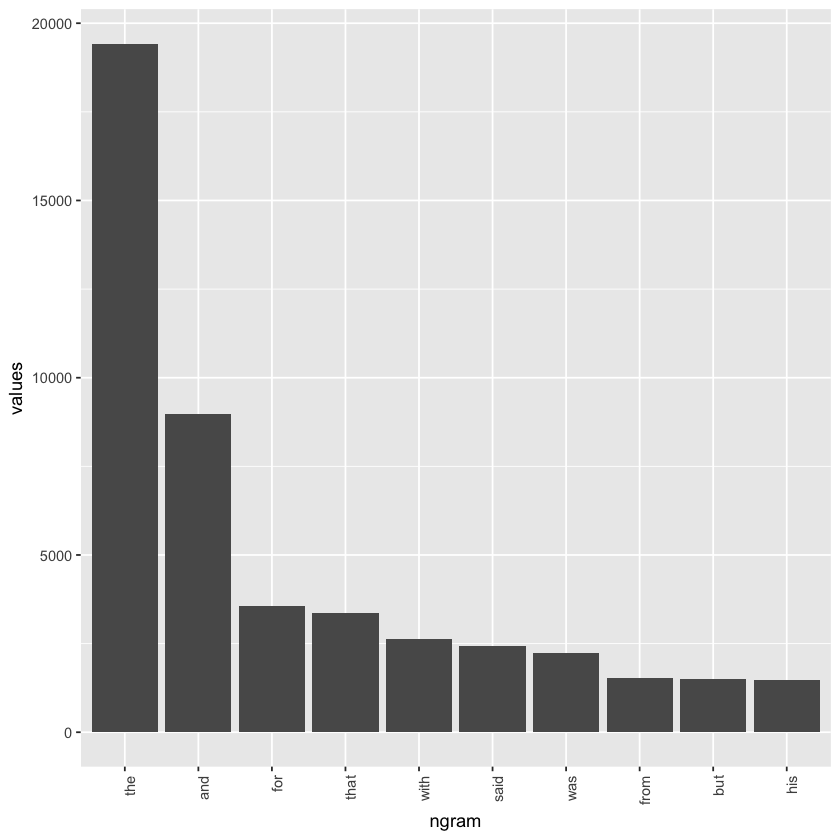

In [5]:
#barplot(ngram1[1:10])

## Make bar plot with ggplot2
ngram1df = data.frame(values = ngram1[1:10], ngram = names(ngram1[1:10]))
library(ggplot2)
## https://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html
## https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/order
ngram1df$ngram <- factor(ngram1df$ngram, levels = ngram1df$ngram[order(ngram1df$values, decreasing = TRUE)])
## https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
ggplot(data=ngram1df, aes(x = ngram, y = values)) + geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

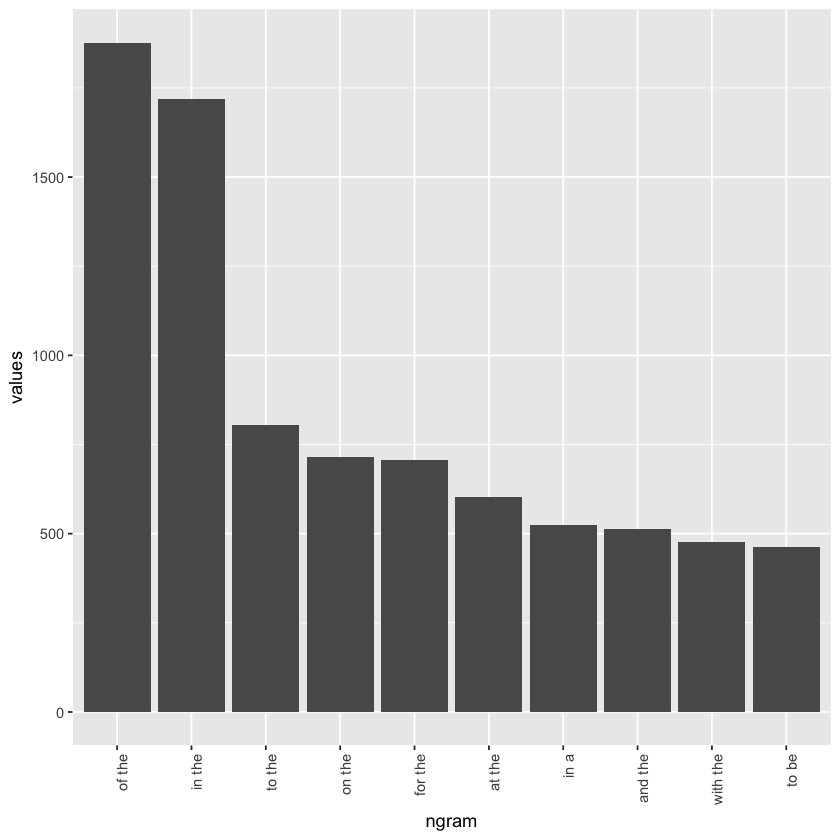

In [6]:
## Rotating x axis labels in R for barplot
## https://stackoverflow.com/questions/10286473/rotating-x-axis-labels-in-r-for-barplot
#barplot(ngram2[1:10], las = 2)

## Make bar plot with ggplot2
ngram2df = data.frame(values = ngram2[1:10], ngram = names(ngram2[1:10]))
library(ggplot2)
## https://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html
## https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/order
ngram2df$ngram <- factor(ngram2df$ngram, levels = ngram2df$ngram[order(ngram2df$values, decreasing = TRUE)])
## https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
ggplot(data=ngram2df, aes(x = ngram, y = values)) + geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

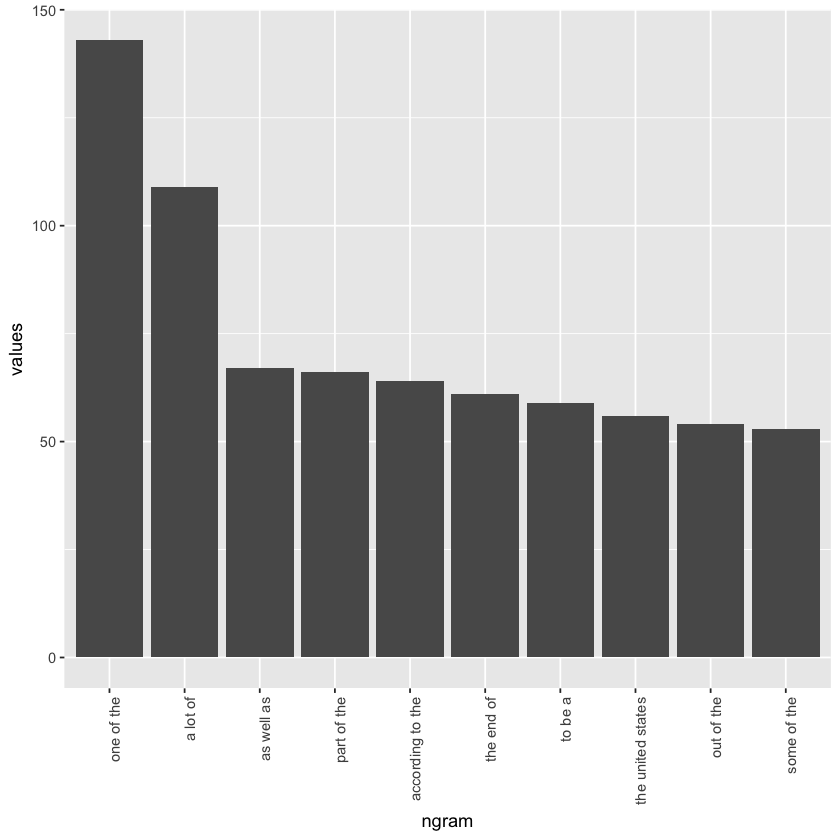

In [7]:
#barplot(ngram3[1:10], las = 2)

## Make bar plot with ggplot2
ngram3df = data.frame(values = ngram3[1:10], ngram = names(ngram3[1:10]))
library(ggplot2)
## https://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html
## https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/order
ngram3df$ngram <- factor(ngram3df$ngram, levels = ngram3df$ngram[order(ngram3df$values, decreasing = TRUE)])
## https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
ggplot(data=ngram3df, aes(x = ngram, y = values)) + geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

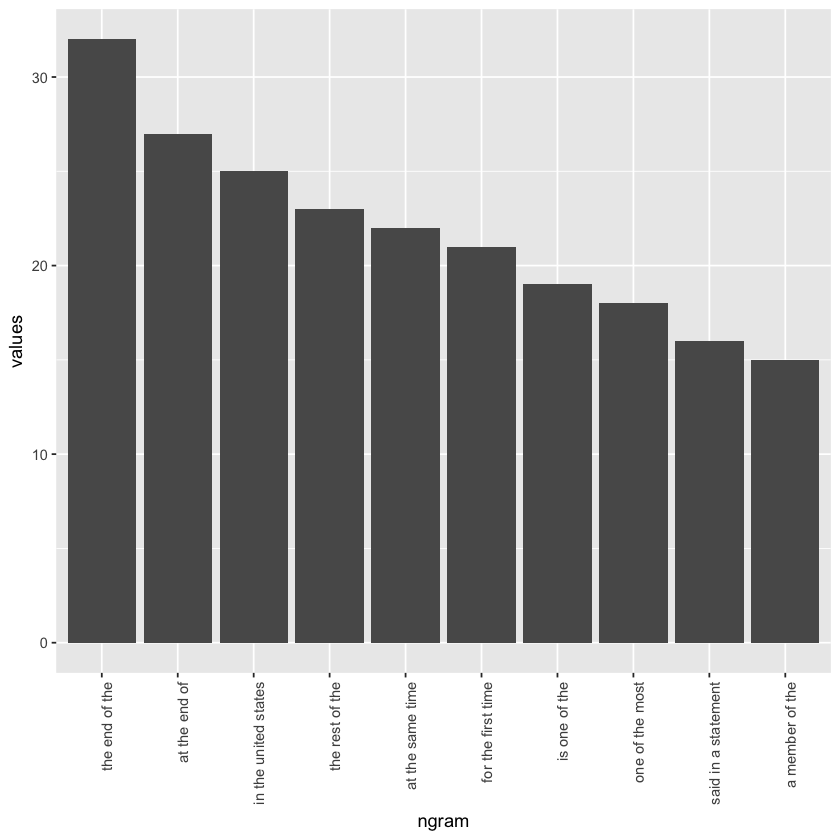

In [8]:
#barplot(ngram4[1:10], las = 2)

## Make bar plot with ggplot2
ngram4df = data.frame(values = ngram4[1:10], ngram = names(ngram4[1:10]))
library(ggplot2)
## https://rstudio-pubs-static.s3.amazonaws.com/7433_4537ea5073dc4162950abb715f513469.html
## https://www.rdocumentation.org/packages/base/versions/3.4.3/topics/order
ngram4df$ngram <- factor(ngram4df$ngram, levels = ngram4df$ngram[order(ngram4df$values, decreasing = TRUE)])
## https://stackoverflow.com/questions/1330989/rotating-and-spacing-axis-labels-in-ggplot2
ggplot(data=ngram4df, aes(x = ngram, y = values)) + geom_col() +
theme(axis.text.x = element_text(angle = 90, hjust = 1))

This means that if you type in `the end of` in the wordprediction app, it will predict `the` as the next word. Or if you type in `one of`, then the trigram will predict `the`. This is indeed what happens when you use the [wordprediction](https://www.coursera.org/specializations/jhu-data-science) Shiny app.

# References

1. https://github.com/hiromiyake/word-prediction
2. https://www.coursera.org/specializations/jhu-data-science
3. https://en.wikipedia.org/wiki/N-gram
4. D. Jurafsky and J. H. Martin, Speech and Language Processing, 2nd Edition, Prentice Hall, 2008.